# Import libraries and data


In [1]:
!pip install pmdarima

In [2]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python


In [3]:
#import libraries
import pandas as pd
import numpy as np

In [4]:
#get the data
data = pd.read_csv("Daily Bike Sharing.csv", 
                   index_col = "dteday", 
                   parse_dates = True)
data.head(1)

instant  season  yr  mnth  ...  windspeed  casual  registered  cnt
dteday                                 ...                                    
2011-01-01        1       1   0     1  ...   0.160446     331         654  985

[1 rows x 15 columns]

In [5]:
#select variables
dataset = data.loc[:, ["cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]
dataset.head(1)                       

cnt  holiday  workingday  ...     atemp       hum  windspeed
dteday                                ...                               
2011-01-01  985        0           0  ...  0.363625  0.805833   0.160446

[1 rows x 8 columns]

#Data Transformation

In [6]:
#renaming variable
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset.head(1)

y  holiday  workingday  ...     atemp       hum  windspeed
dteday                                ...                               
2011-01-01  985        0           0  ...  0.363625  0.805833   0.160446

[1 rows x 8 columns]

In [7]:
#index
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

#Visualization

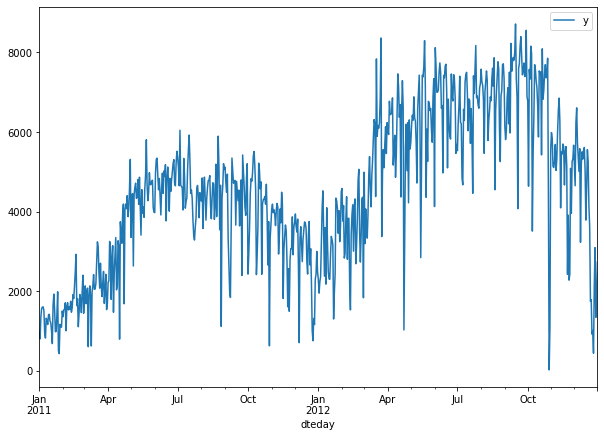

In [8]:
#viz
dataset["y"].plot(figsize = (10, 7), legend = True)

#Stationarity

In [9]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(dataset['y'])
print('Augmented Dickey Fuller p-value: %F' % stationarity[1])

Augmented Dickey Fuller p-value: 0.342743


#Training and Test Set

In [10]:
#Training and test set
test_days = 31
training_set = dataset.iloc[:-test_days, :]
test_set = dataset.iloc[-test_days:, :]
test_set.tail(1)

y  holiday  workingday  ...     atemp     hum  windspeed
dteday                                 ...                             
2012-12-31  2729        0           1  ...  0.223487  0.5775   0.154846

[1 rows x 8 columns]

#Forecasting Model

In [13]:
#exogenous variables
train_exog = training_set.iloc[:,1:]
test_exog = test_set.iloc[:,1:]
test_exog.head()

holiday  workingday  weathersit  ...     atemp       hum  windspeed
dteday                                       ...                               
2012-12-01        0           0           2  ...  0.316904  0.806667   0.059704
2012-12-02        0           0           2  ...  0.359208  0.823333   0.124379
2012-12-03        0           1           1  ...  0.455796  0.767500   0.082721
2012-12-04        0           1           1  ...  0.469054  0.733750   0.174129
2012-12-05        0           1           1  ...  0.428012  0.485000   0.324021

[5 rows x 7 columns]

In [11]:
#Libraries
from pmdarima import auto_arima

In [14]:
#forecasting model
model = auto_arima(y = training_set['y'],
                   X = train_exog,
                   m = 7,
                   seasonal = True,
                   stepwise = False)

In [15]:
#summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -5596.921
Date:                Fri, 30 Apr 2021   AIC                          11217.842
Time:                        05:31:28   BIC                          11272.438
Sample:                    01-01-2011   HQIC                         11238.948
                         - 11-30-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.3328      5.562      0.779      0.436      -6.568      15.234
holiday     -240.2571    129.107     -1.861      0.063    -493.302      12.788
workingday    89.1953     60.522      1.474      0.141     -29.426     207.816
weathersit  -460.2002     51.302     -8.970      0.000    -560.750    -359.650
temp        3421.5993   1170.508      2.923      0.003    1127.446    5715.753
atemp       1970.5687   1197.090      1.646      0.100    -375.685    4316.823
hum        -2280.4054    198.511    -11.488      0.000   -2669.480   -1891.330
windspeed  -2275.5764    373.369     -6.095      0.000   -3007.365   -1543.787
ma.L1         -0.5546      0.028    -19.641      0.000      -0.610      -0.499
ma.L2         -0.1348      0.039     -3.423      0.001      -0.212      -0.058
ma.L3         -0.1443      0.040     -3.608      0.000      -0.223      -0.066
sigma2      5.262e+05   2.02e+04     26.108      0.000    4.87e+05    5.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               623.67
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.51   Skew:                            -0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
#predictions
predictions_sarimax = pd.Series(model.predict(n_periods= test_days,
                              X = test_exog)).rename("SARIMAX")
predictions_sarimax.index = test_set.index                              
predictions_sarimax

dteday
2012-12-01    4288.869860
2012-12-02    4216.860537
2012-12-03    5448.132504
2012-12-04    5427.384612
2012-12-05    5448.691488
2012-12-06    4779.472892
2012-12-07    4189.662621
2012-12-08    4177.147351
2012-12-09    4075.804446
2012-12-10    4317.400467
2012-12-11    4356.026307
2012-12-12    4524.382739
2012-12-13    5071.257616
2012-12-14    4766.534939
2012-12-15    4953.682823
2012-12-16    4274.442767
2012-12-17    4385.489031
2012-12-18    5195.043814
2012-12-19    4976.270524
2012-12-20    4518.732064
2012-12-21    4148.932801
2012-12-22    4374.932870
2012-12-23    4811.837792
2012-12-24    3892.290778
2012-12-25    3763.235964
2012-12-26    2788.295667
2012-12-27    3614.518315
2012-12-28    4258.414035
2012-12-29    3847.858023
2012-12-30    4399.496184
2012-12-31    4110.840550
Freq: D, Name: SARIMAX, dtype: float64

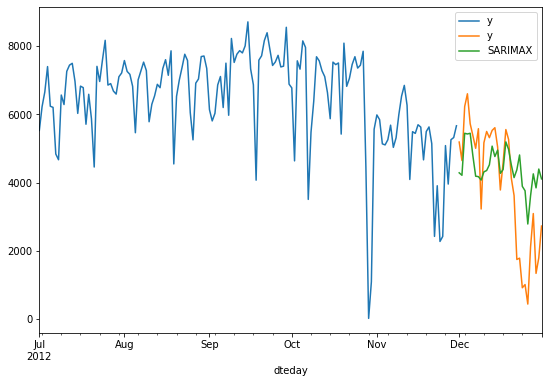

In [19]:
#visualization
training_set['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_sarimax.plot(legend = True)

#Model assessment

In [20]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_sarimax),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_sarimax)), 0))

1180.0
1480.0


In [21]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_sarimax)

71.25665833261257

#export forecasts

In [22]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/0. Ensemble

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/0. Ensemble


In [23]:
predictions_sarimax.to_csv('predictions_sarimax.csv', index = True)